# Algorithme des Thresholding

each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background

# Importation des modules nécessaires

In [333]:
import cv2
import matplotlib.pyplot as plt
import nose.tools
import numpy as np
import imageio
import scipy.ndimage
import skimage.filters
import sklearn.metrics
from scipy.cluster.vq import *
import os

La fonction get_images_from_folder nous permet de lire les différentes images contenues dans un dossier donné et de les convertir en des arrays

In [334]:
def get_images_from_folder(folderpath):
    list_image_names = os.listdir(folderpath)
    image_list = []
    for image_name in list_image_names:
        if image_name != "Thumbs.db":
            image = imageio.imread(folderpath + "/" + image_name)
            image_list.append(image)
    return image_list

la fonction filter_images_from_noise utilise un filtre appelé "Median filter"
pour éliminer le bruit s'il existe avant de faire la segmentation
c'est juste pour mieux sipmlifier et éliminer le bruit

In [335]:
def filter_images_from_noise():
    images=[]
    for i in range(len(imageso)):   
        median_filtered_image = scipy.ndimage.median_filter(imageso[i], size=3)
        images.append(median_filtered_image)
        plt.imshow(median_filtered_image, cmap='gray')
        plt.axis('off')
        plt.title("filtered image")
        plt.show()
    return images

La fonction `segmentation` nous permet d'appliquer la segmentation de threshold sur une dataset.

In [336]:
def segmentation():
    predicted_images=[]
    for i in range(len(imageso)):
        threshold = skimage.filters.threshold_li(images[i])
        predicted = np.uint8(images[i] > threshold) * 255
        predicted_images.append(predicted)
        plt.subplot(1, 3, 1)
        plt.imshow(predicted, cmap='gray')
        plt.axis('off')
        plt.title("predicted image")
        plt.subplot(1, 3, 2)
        plt.imshow(imagesv[i], cmap='gray')
        plt.title("imagev")
        plt.axis("off")
        plt.subplot(1, 3, 3)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title("original image")
        plt.axis("off")
        plt.show()
    return predicted_images

La fonction `get_accuracy` nous permet de calculer la précison de l'algorithme sur chaque image.

In [359]:
def get_accuracy(true_images,predicted_images):
    acc=[]
    for k in range(len(imageso)):  
        l=[]
        for i in range(true_images[k].shape[0]):
            for j in range(true_images[k].shape[1]):
                #remarque si on va tester sur dataset3: cellules on éfface [0]
                l.append(true_images[k][i][j][0] - predicted_images[k][i][j])
        errors = np.count_nonzero(l)
        print("accuracy of segmentation on image",k+1,": ",1-(errors/len(l)))
        acc.append(1-(errors/len(l)))
    print("accuracy of segmentation on the dataset : ",np.mean(acc))

# Dataset1 : 1objet


D'abord, on va définir les chemins des datasets qu'on va utiliser pour faire la segmentation

In [338]:
folderpath = "Datasets/images/1objet"
labels_folderpath = "Datasets/verite_terrain/1objet"

In [339]:
imageso=get_images_from_folder(folderpath)
imagesv=get_images_from_folder(labels_folderpath)

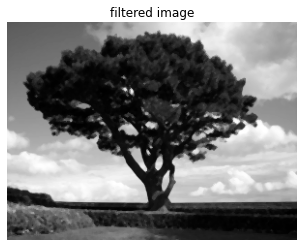

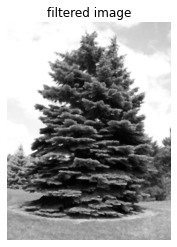

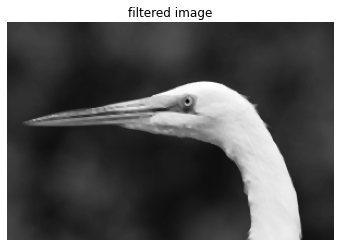

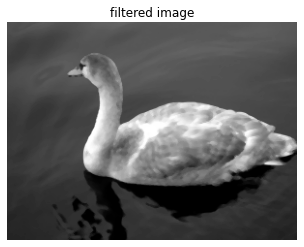

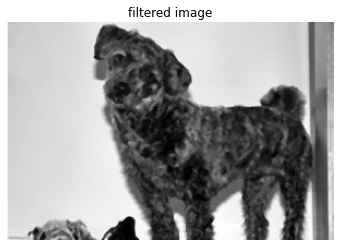

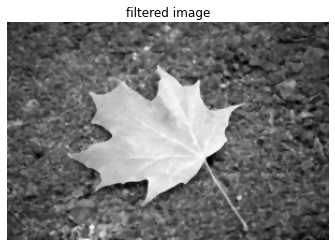

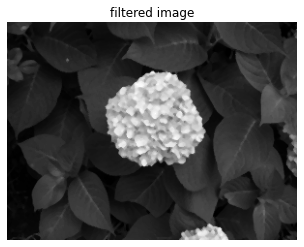

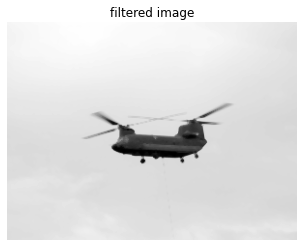

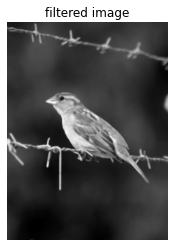

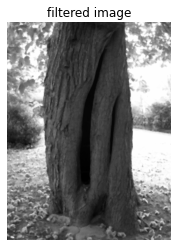

In [340]:
images = filter_images_from_noise()

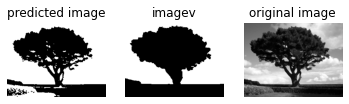

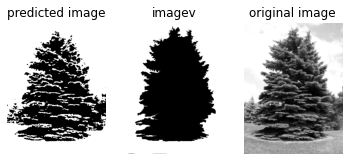

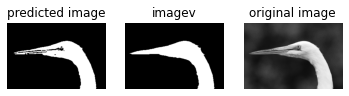

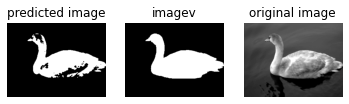

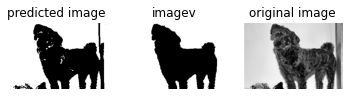

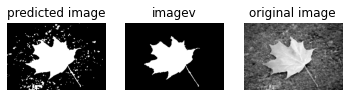

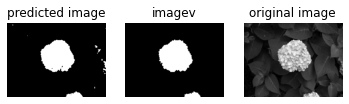

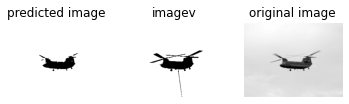

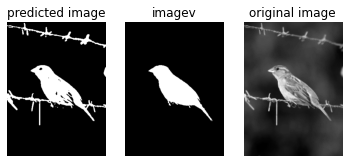

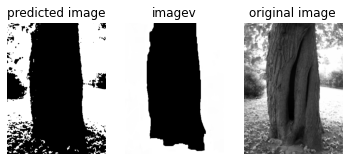

In [341]:
predicted_images = segmentation()

In [342]:
get_accuracy(imagesv,predicted_images)

<ipython-input-337-cf6644a93627>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  l.append(true_images[k][i][j][0] - predicted_images[k][i][j])


accuracy of segmentation on image 1 :  0.8976296296296297
accuracy of segmentation on image 2 :  0.801175
accuracy of segmentation on image 3 :  0.9858333333333333
accuracy of segmentation on image 4 :  0.9556444444444444
accuracy of segmentation on image 5 :  0.93935
accuracy of segmentation on image 6 :  0.9590147783251232
accuracy of segmentation on image 7 :  0.9938222222222223
accuracy of segmentation on image 8 :  0.9844
accuracy of segmentation on image 9 :  0.9535053235053235
accuracy of segmentation on image 10 :  0.707025
accuracy of segmentation on the dataset :  0.9177399731460076


# Dataset2 : 2objets

In [343]:
folderpath = "Datasets/images/2objets"
labels_folderpath = "Datasets/verite_terrain/2objets"

In [344]:
imageso=get_images_from_folder(folderpath)
imagesv=get_images_from_folder(labels_folderpath)

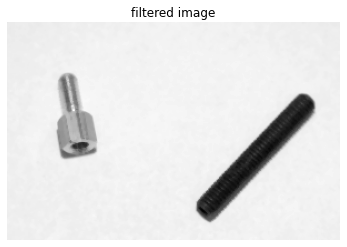

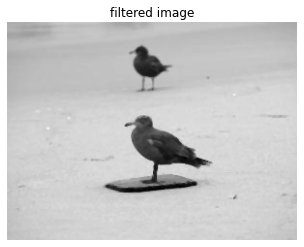

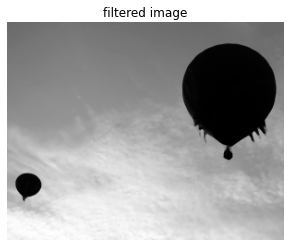

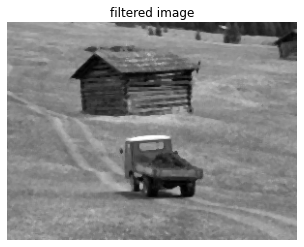

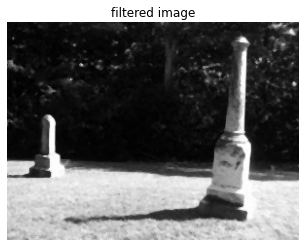

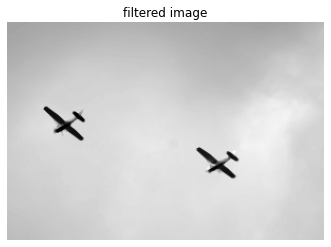

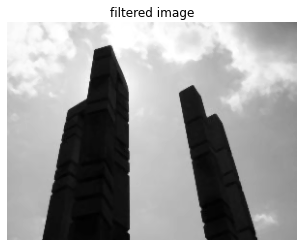

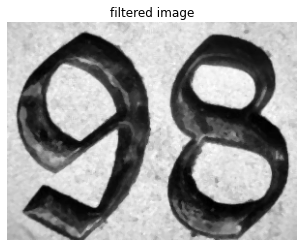

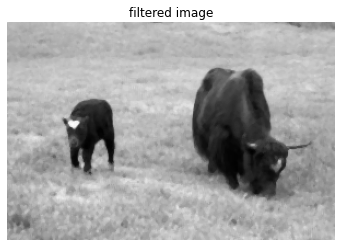

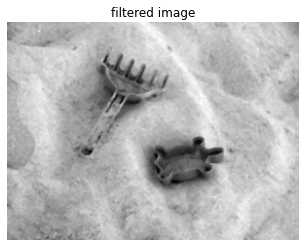

In [345]:
images = filter_images_from_noise()

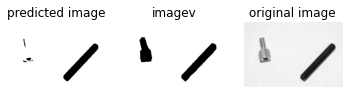

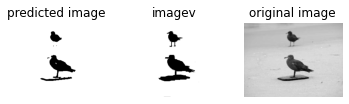

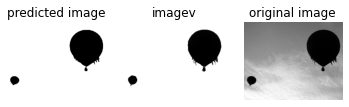

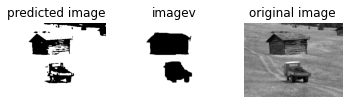

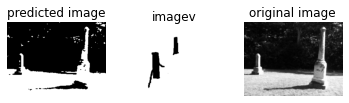

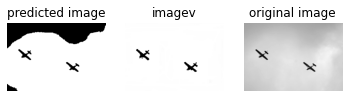

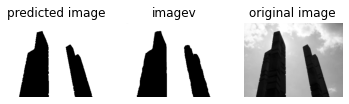

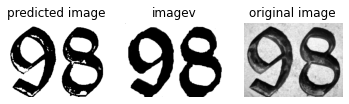

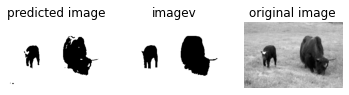

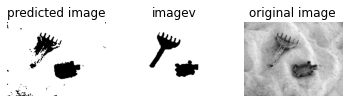

In [346]:
predicted_images = segmentation()

In [347]:
get_accuracy(imagesv,predicted_images)

<ipython-input-337-cf6644a93627>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  l.append(true_images[k][i][j][0] - predicted_images[k][i][j])


accuracy of segmentation on image 1 :  0.9662585034013605
accuracy of segmentation on image 2 :  0.9805777777777778
accuracy of segmentation on image 3 :  0.9212994350282486
accuracy of segmentation on image 4 :  0.8899259259259259
accuracy of segmentation on image 5 :  0.3072666666666667
accuracy of segmentation on image 6 :  0.6136245954692556
accuracy of segmentation on image 7 :  0.9896
accuracy of segmentation on image 8 :  0.9081185185185185
accuracy of segmentation on image 9 :  0.9784589614740369
accuracy of segmentation on image 10 :  0.9472767857142858
accuracy of segmentation on the dataset :  0.8502407169976077


# Dataset3 : cellules

In [354]:
folderpath = "Datasets/images/cellules"
labels_folderpath = "Datasets/verite_terrain/cellules"

In [355]:
imageso=get_images_from_folder(folderpath)
imagesv=get_images_from_folder(labels_folderpath)

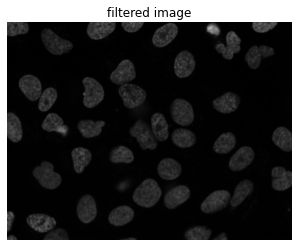

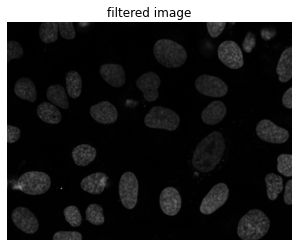

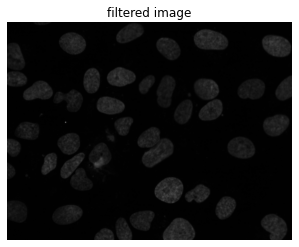

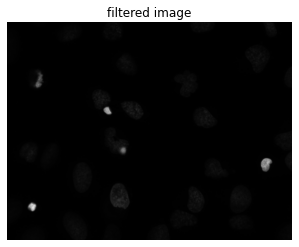

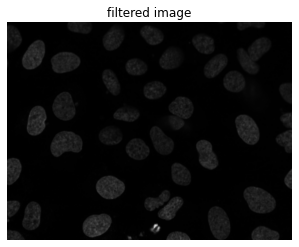

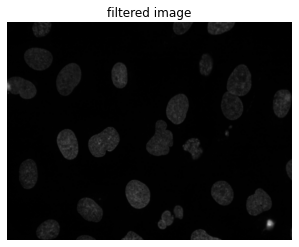

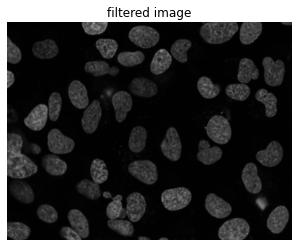

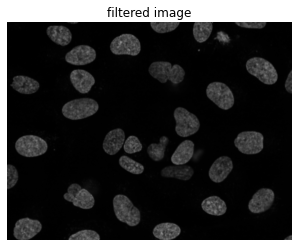

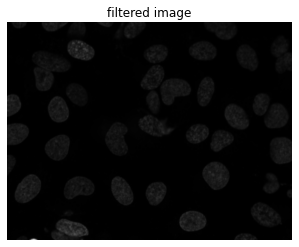

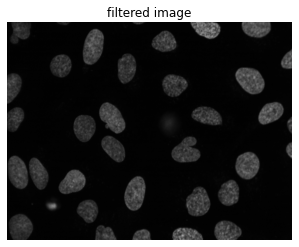

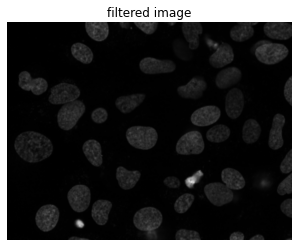

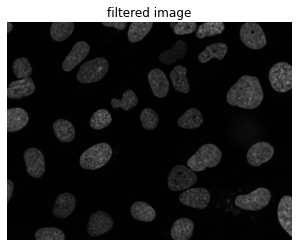

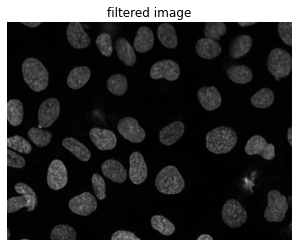

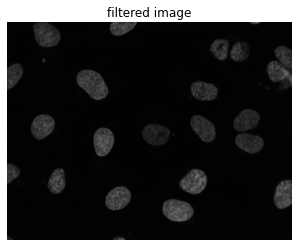

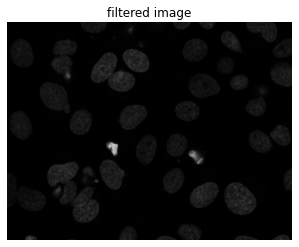

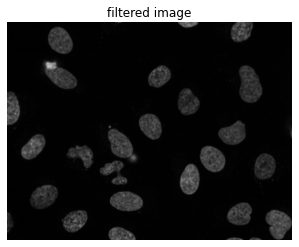

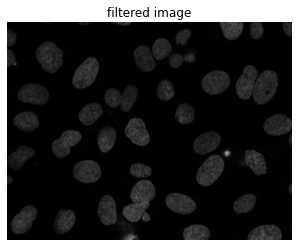

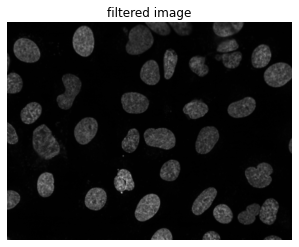

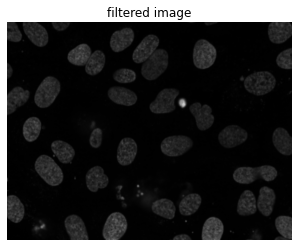

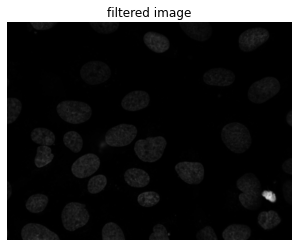

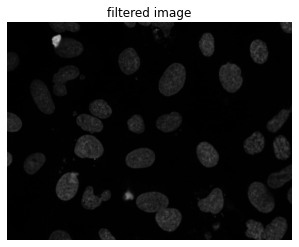

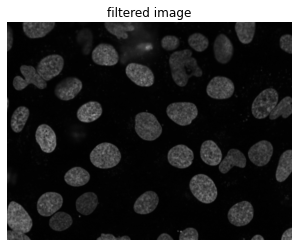

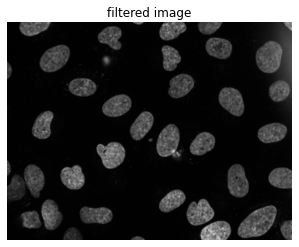

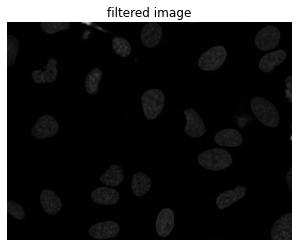

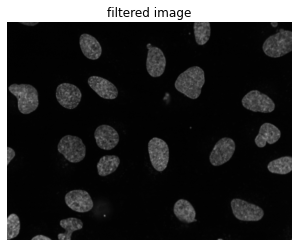

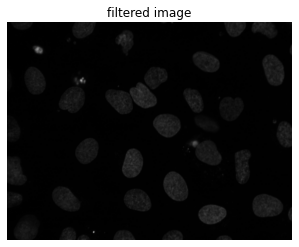

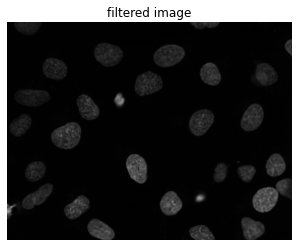

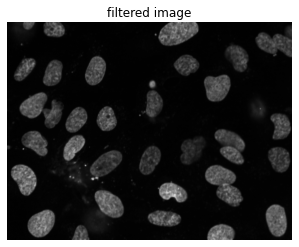

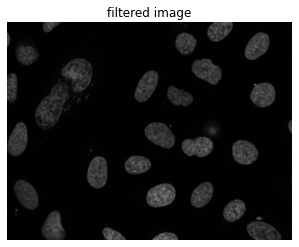

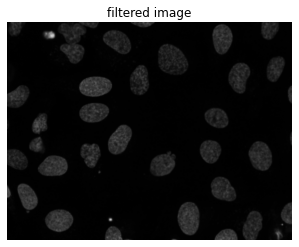

In [356]:
images = filter_images_from_noise()

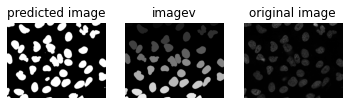

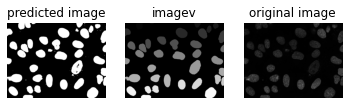

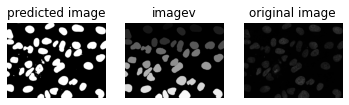

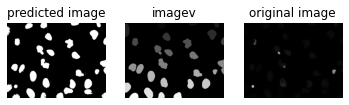

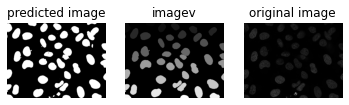

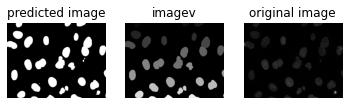

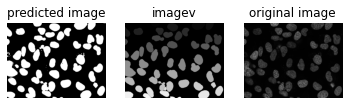

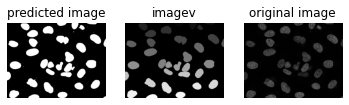

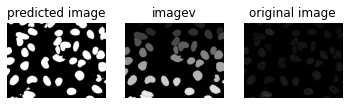

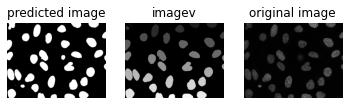

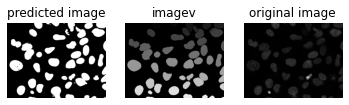

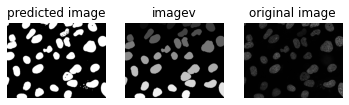

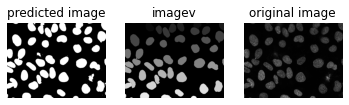

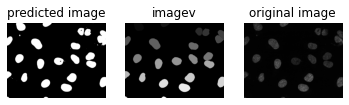

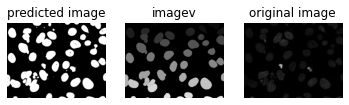

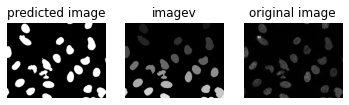

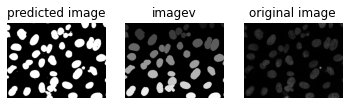

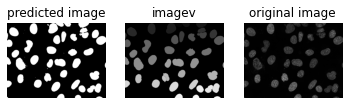

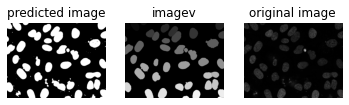

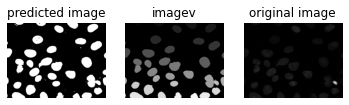

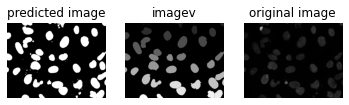

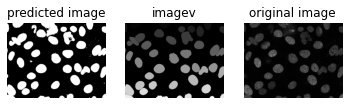

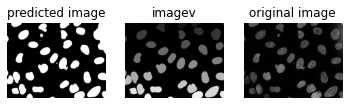

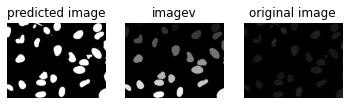

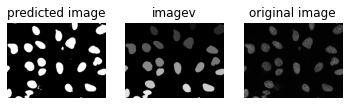

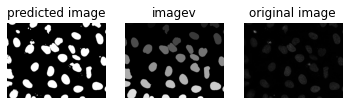

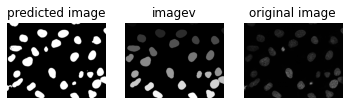

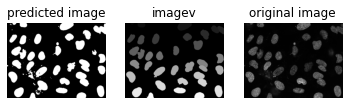

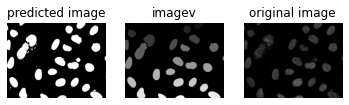

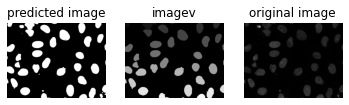

In [357]:
predicted_images = segmentation()

In [358]:
get_accuracy(imagesv,predicted_images)

accuracy of segmentation on image 1 :  0.16372141895830783
accuracy of segmentation on image 2 :  0.18727284504163455
accuracy of segmentation on image 3 :  0.15084888482658854
accuracy of segmentation on image 4 :  0.4453129610570937
accuracy of segmentation on image 5 :  0.17494224416504134
accuracy of segmentation on image 6 :  0.45137570440527686
accuracy of segmentation on image 7 :  -0.05381404420390501
accuracy of segmentation on image 8 :  0.314661705542401
accuracy of segmentation on image 9 :  0.1400944244927922
accuracy of segmentation on image 10 :  0.2873707240890412
accuracy of segmentation on image 11 :  0.037962676416187446
accuracy of segmentation on image 12 :  0.18327419807552525
accuracy of segmentation on image 13 :  0.07882573931067238
accuracy of segmentation on image 14 :  0.5271923827070754
accuracy of segmentation on image 15 :  0.11921380094568435
accuracy of segmentation on image 16 :  0.4544675307851195
accuracy of segmentation on image 17 :  0.135238616162

# Dataset4 : textfort

In [348]:
folderpath = "Datasets/images/textfort"
labels_folderpath = "Datasets/verite_terrain/textfort"

In [349]:
imageso=get_images_from_folder(folderpath)
imagesv=get_images_from_folder(labels_folderpath)

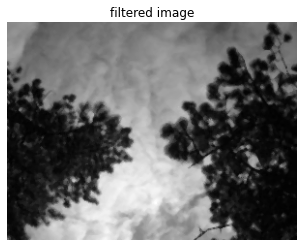

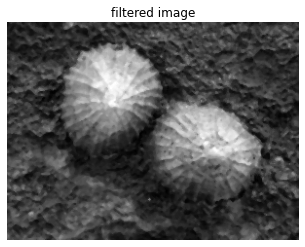

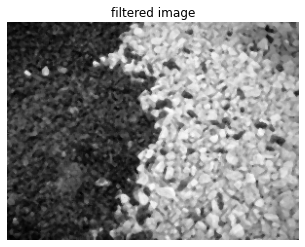

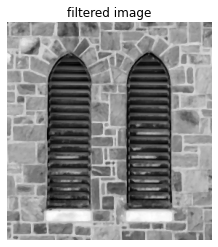

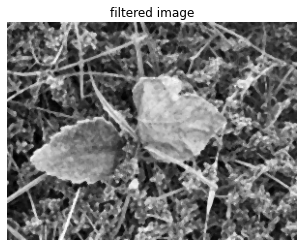

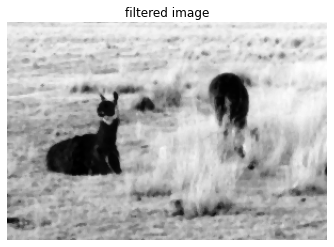

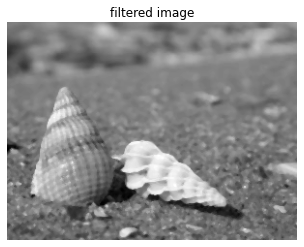

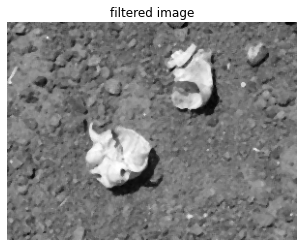

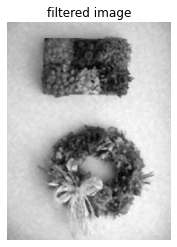

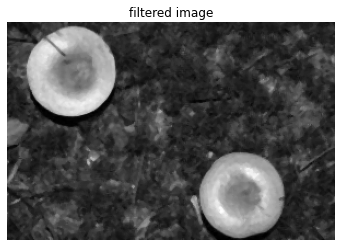

In [350]:
images = filter_images_from_noise()

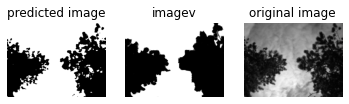

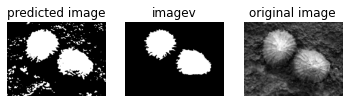

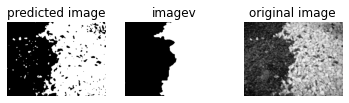

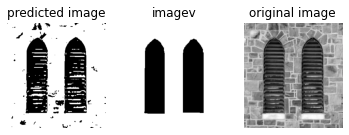

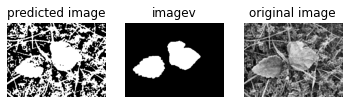

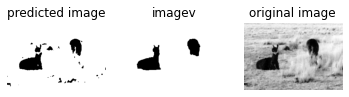

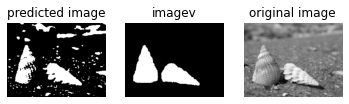

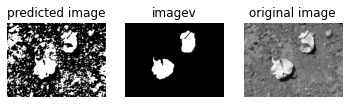

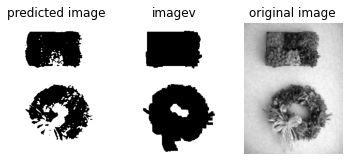

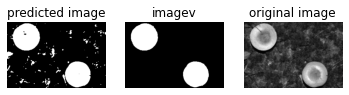

In [351]:
predicted_images = segmentation()

In [352]:
get_accuracy(imagesv,predicted_images)

<ipython-input-337-cf6644a93627>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  l.append(true_images[k][i][j][0] - predicted_images[k][i][j])


accuracy of segmentation on image 1 :  0.8933333333333333
accuracy of segmentation on image 2 :  0.911547619047619
accuracy of segmentation on image 3 :  0.9352827380952381
accuracy of segmentation on image 4 :  0.9190661938534279
accuracy of segmentation on image 5 :  0.606562962962963
accuracy of segmentation on image 6 :  0.9788071895424837
accuracy of segmentation on image 7 :  0.8531703703703704
accuracy of segmentation on image 8 :  0.7234222222222222
accuracy of segmentation on image 9 :  0.8950518518518519
accuracy of segmentation on image 10 :  0.9657788944723618
accuracy of segmentation on the dataset :  0.8682023375751872
